<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-26 15:11:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  37.6MB/s    in 4.9s    

2025-05-26 15:11:35 (40.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 154.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 154.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 155.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 134.2 MB/s eta 0:00:0000:01


#### Connect to the SQLite database


In [4]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [2]:
import os
print(os.listdir('.'))


['.ipynb_checkpoints', 'Lab 14 Data Visualization - Histogram.ipynb', 'Lab Data Visualization.ipynb', 'cleaned_stackoverflow_survey.csv', 'survey-data.csv']


In [3]:
import pandas as pd

# Read the CSV file (no need to include a path if it's in the same directory)
df = pd.read_csv('cleaned_stackoverflow_survey.csv')

# Preview the first few rows
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Employment_Simple,EdLevel_Simple_check,EdLevel_Simple
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed,Primary,Primary
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Employed,Bachelor's,Bachelor's
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,Employed,Master's,Master's
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,Too long,Easy,NaN,NaN,Student,Some College,Some College
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,Too short,Easy,NaN,NaN,Student,Secondary,Secondary


In [4]:
# Step 1: Drop NaN values from CompTotal
comp = df['CompTotal'].dropna()

# Step 2: Calculate Q1 and Q3
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# Step 3: Filter out values above Q3 (i.e., remove upper outliers)
filtered_df = df[(df['CompTotal'] <= Q3)]

# Optional: Check how many rows remain
print(f"Remaining rows after filtering: {len(filtered_df)}")


Remaining rows after filtering: 20822


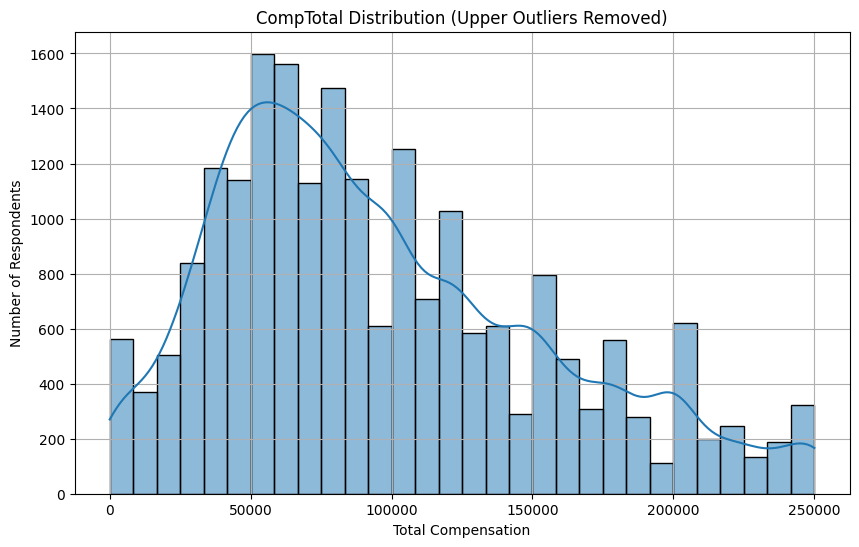

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['CompTotal'], bins=30, kde=True)
plt.title('CompTotal Distribution (Upper Outliers Removed)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


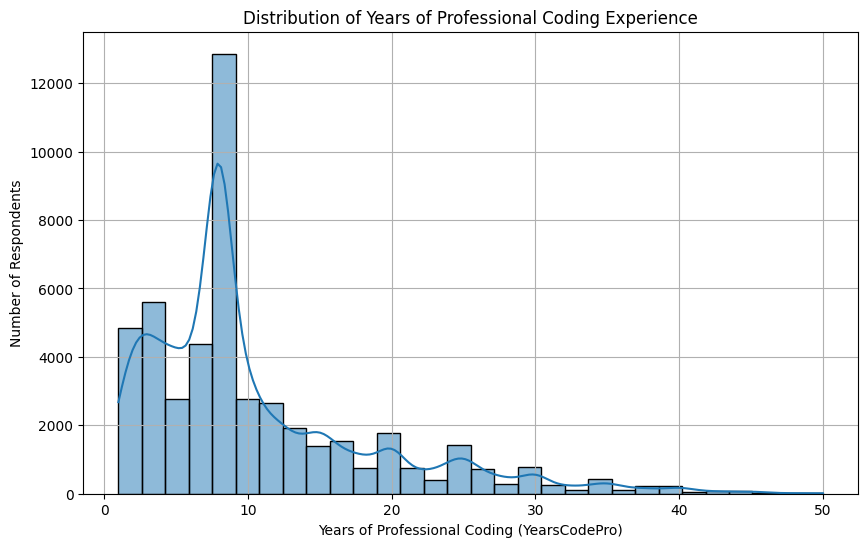

In [6]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values and filter out non-numeric or unusual entries
df_years = df['YearsCodePro'].dropna()

# Convert to numeric (some entries might be strings like 'Less than 1 year' or 'More than 50 years')
def clean_years(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return None

df_years_clean = df_years.apply(clean_years).dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_years_clean, bins=30, kde=True)
plt.title('Distribution of Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding (YearsCodePro)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


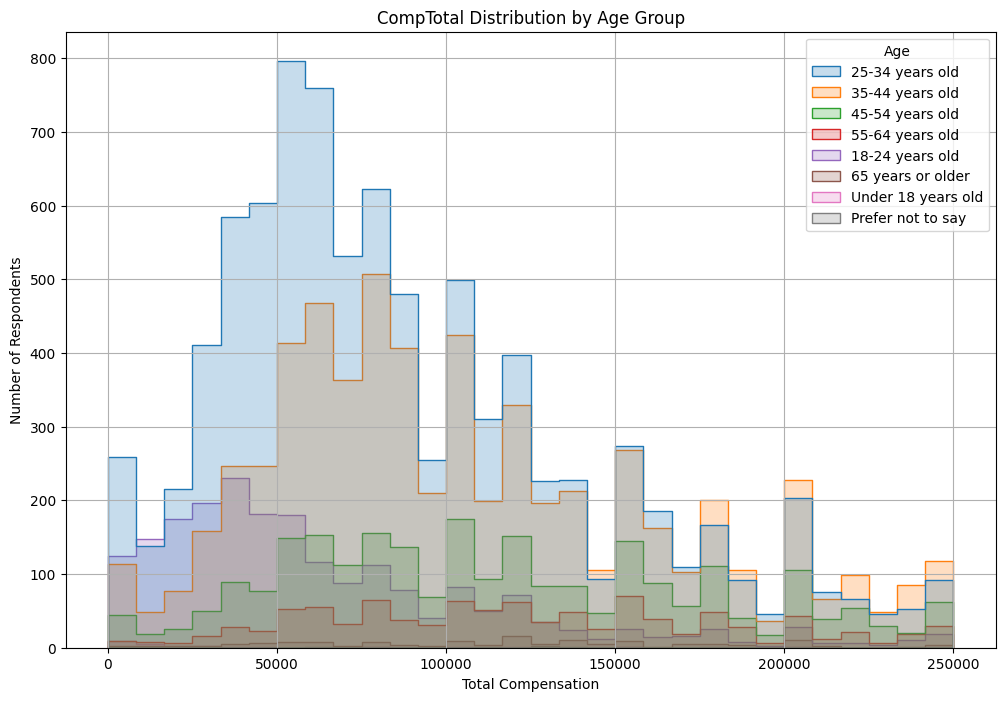

In [7]:
## Write your code here
plt.figure(figsize=(12, 8))

# Filter out rows with missing Age or CompTotal
df_age_comp = df[['Age', 'CompTotal']].dropna()

# Optional: filter out compensation outliers again (using previous Q3 approach)
df_age_comp = df_age_comp[df_age_comp['CompTotal'] <= Q3]  # reuse earlier Q3 value

# Plot histogram using seaborn hue for Age group
sns.histplot(data=df_age_comp, x='CompTotal', hue='Age', element='step', bins=30, common_norm=False)

plt.title('CompTotal Distribution by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


/tmp/ipykernel_300/390644182.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age (ordered)')


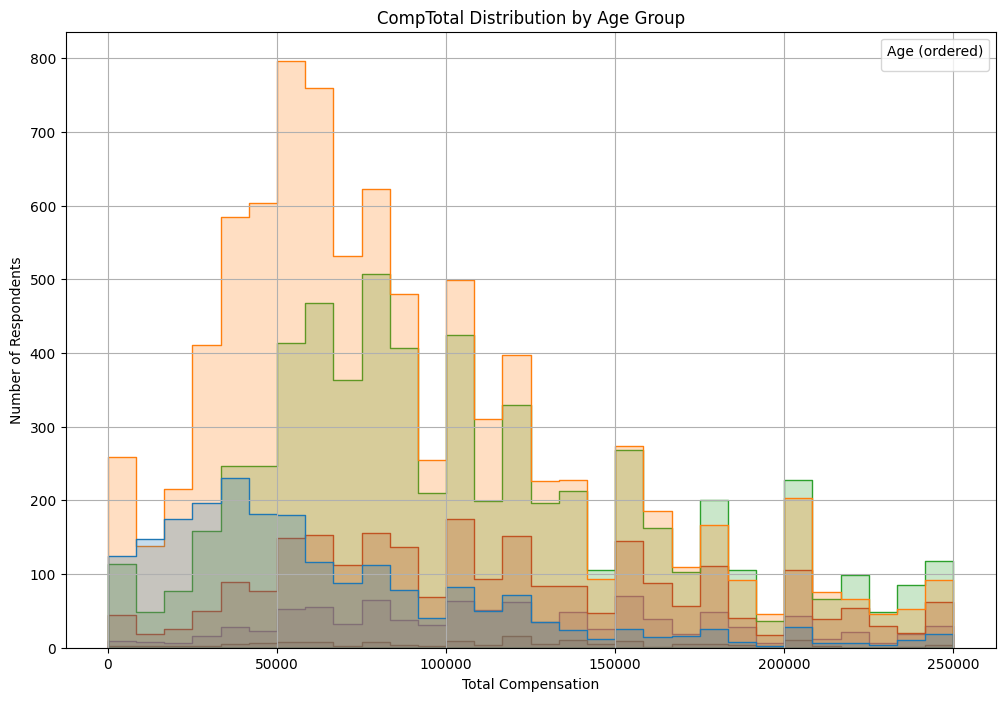

In [8]:
# Step 1: Define your desired age order and filter
age_order = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# Step 2: Filter the DataFrame
df_filtered_age = df[
    df['Age'].isin(age_order) & 
    df['CompTotal'].notna() & 
    (df['CompTotal'] <= Q3)  # reuse previously defined Q3
]

# Step 3: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(data=df_filtered_age, x='CompTotal', hue='Age', hue_order=age_order, bins=30, element='step', common_norm=False)

plt.title('CompTotal Distribution by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.legend(title='Age (ordered)')
plt.show()


/tmp/ipykernel_300/2822677406.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plot.legend(handles=handles[1:], labels=labels[1:], title="Age Group")  # skip "CompTotal" handle
/tmp/ipykernel_300/2822677406.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group')


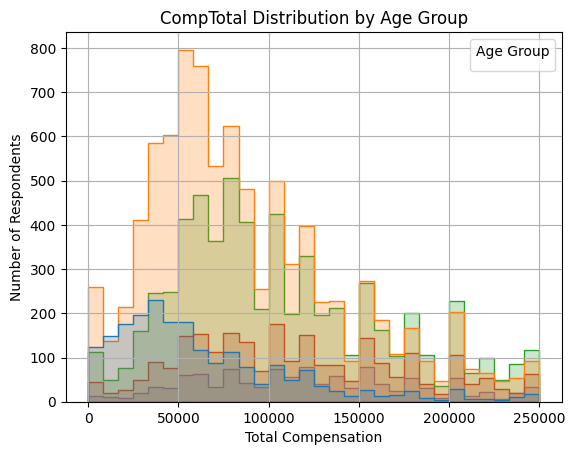

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a simplified AgeGroup column
def simplify_age(age):
    if age in ['55-64 years old', '65 years or older']:
        return '55+ years old'
    elif age in ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old']:
        return age
    else:
        return None  # exclude 'Under 18' and 'Prefer not to say'

df['AgeGroup'] = df['Age'].apply(simplify_age)

# Step 2: Filter data
age_order = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55+ years old']
df_agegroup = df[
    df['AgeGroup'].isin(age_order) &
    df['CompTotal'].notna() &
    (df['CompTotal'] <= Q3)  # reuse your previously computed Q3
]

# Step 3: Plot
plot = sns.histplot(
    data=df_agegroup,
    x='CompTotal',
    hue='AgeGroup',
    hue_order=age_order,
    bins=30,
    element='step',
    common_norm=False
)

# Force the legend to show manually
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles[1:], labels=labels[1:], title="Age Group")  # skip "CompTotal" handle


plt.title('CompTotal Distribution by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.legend(title='Age Group')
plt.show()


/tmp/ipykernel_300/817797737.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


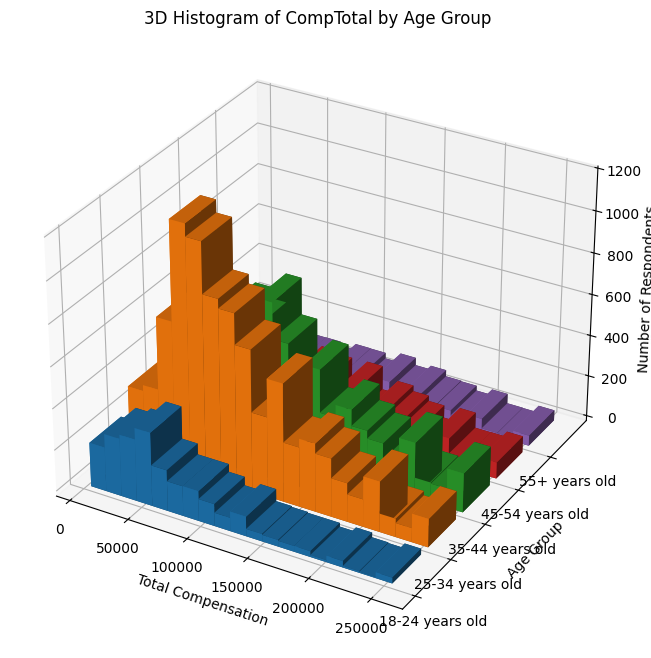

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Bin compensation values (shared across all groups)
bins = np.linspace(0, Q3, 20)  # 20 bins up to Q3
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# 2. Prepare 3D data
age_groups = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55+ years old']
age_indices = np.arange(len(age_groups))

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# 3. Plot each age group
for i, age in enumerate(age_groups):
    group_data = df_agegroup[df_agegroup['AgeGroup'] == age]['CompTotal']
    counts, _ = np.histogram(group_data, bins=bins)
    
    # Create 3D bars
    xs = bin_centers
    ys = [i] * len(xs)
    zs = np.zeros_like(xs)
    dx = bins[1] - bins[0]
    dy = 0.8  # bar thickness for spacing
    dz = counts

    ax.bar3d(xs, ys, zs, dx, dy, dz, shade=True)

# 4. Customize axes
ax.set_xlabel('Total Compensation')
ax.set_ylabel('Age Group')
ax.set_zlabel('Number of Respondents')
ax.set_yticks(age_indices)
ax.set_yticklabels(age_groups)
ax.set_title('3D Histogram of CompTotal by Age Group')

plt.tight_layout()
plt.show()


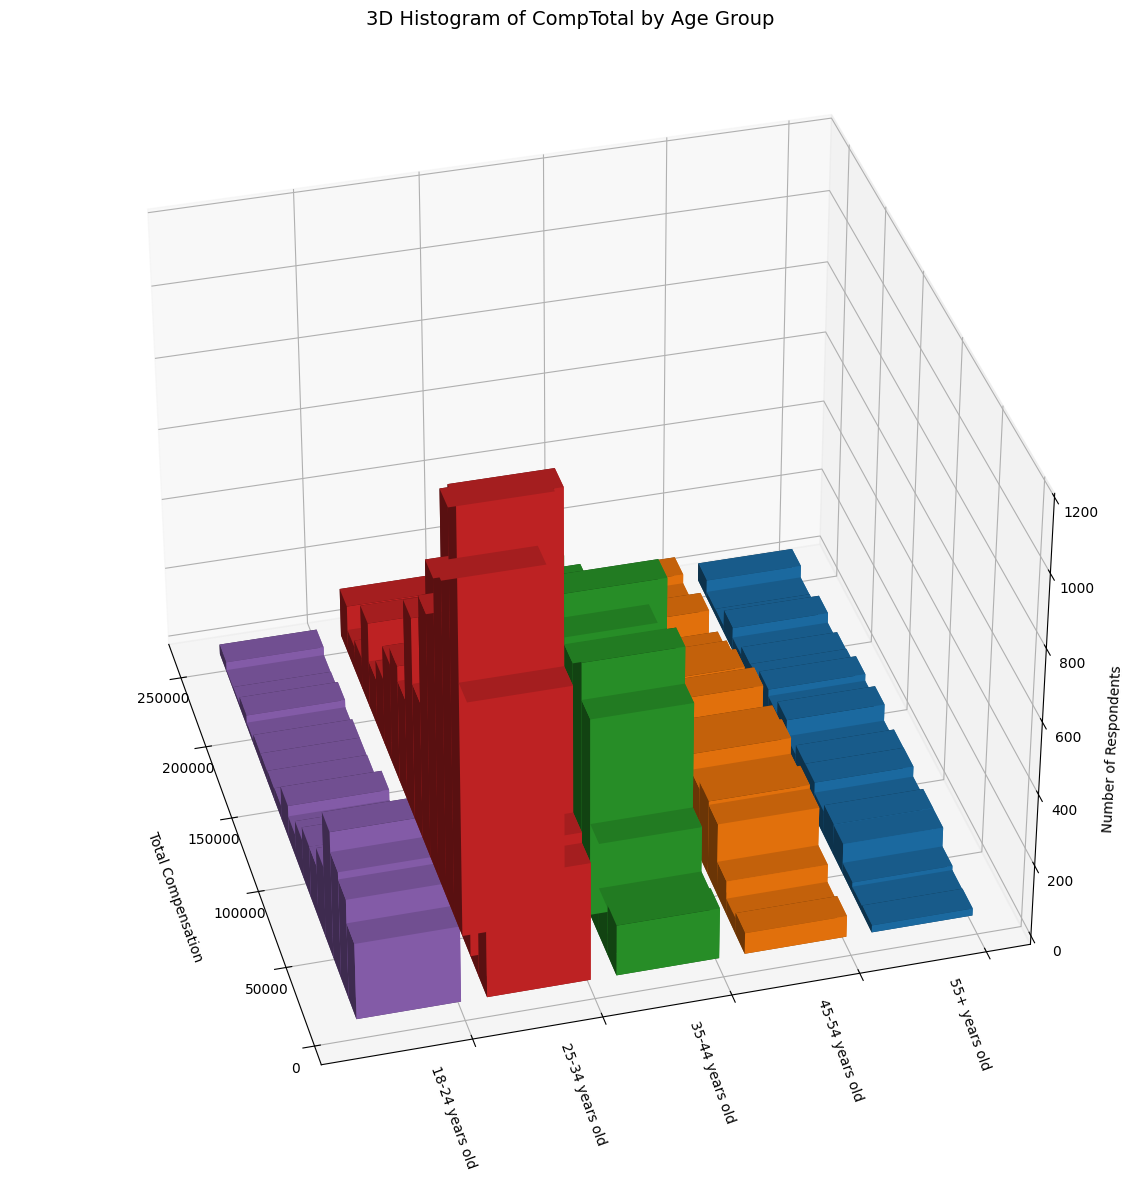

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')

# Reverse age group order and reassign indices
age_groups = ['55+ years old', '45-54 years old', '35-44 years old', '25-34 years old', '18-24 years old']
age_indices = np.arange(len(age_groups))


for i, age in enumerate(age_groups):
    group_data = df_agegroup[df_agegroup['AgeGroup'] == age]['CompTotal']
    counts, _ = np.histogram(group_data, bins=bins)
    
    xs = bin_centers
    ys = [i] * len(xs)
    zs = np.zeros_like(xs)
    dx = bins[1] - bins[0]
    dy = 0.8
    dz = counts

    ax.bar3d(xs, ys, zs, dx, dy, dz, shade=True)

# Axis labels and ticks
ax.set_xlabel('Total Compensation', labelpad=20)  # default is ~6
#ax.set_ylabel('Age Group', labelpad=10)
ax.set_zlabel('Number of Respondents', labelpad=10)
plt.title('3D Histogram of CompTotal by Age Group', pad=0, fontsize=14)


# Set custom Y-tick labels with rotation
ax.set_yticks(age_indices)
ax.set_yticklabels(age_groups, rotation=-70, ha='right', fontsize=10)
ax.view_init(elev=35, azim=165)

# Adjust layout to reduce clipping
plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.1)
plt.show()



**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [51]:
df['TimeSearching'].value_counts(dropna=False)

TimeSearching
NaN                           25734
30-60 minutes a day            8910
15-30 minutes a day            6451
60-120 minutes a day           4215
Less than 15 minutes a day     2237
Over 120 minutes a day         1749
Name: count, dtype: int64

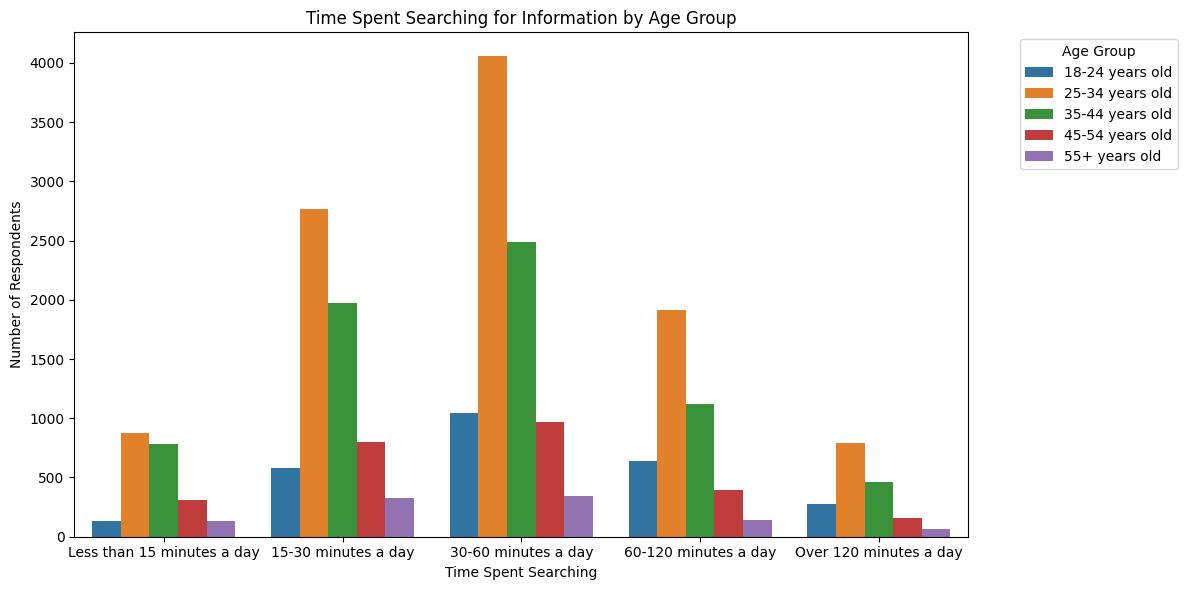

In [54]:
## Write your code here
# Define clean order of time categories
time_order = [
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
]

# Filter for rows with valid AgeGroup and valid TimeSearching
df_search = df[
    df['AgeGroup'].isin(age_groups) &
    df['TimeSearching'].isin(time_order)
]

age_order = [
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55+ years old'
]


# Plot grouped bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
#sns.countplot(data=df_search, x='TimeSearching', hue='AgeGroup', order=time_order)

sns.countplot(
    data=df_search,
    x='TimeSearching',
    hue='AgeGroup',
    hue_order=age_order,           # This enforces the order
    order=time_order               # keep the time categories ordered too
)


plt.title('Time Spent Searching for Information by Age Group')
plt.xlabel('Time Spent Searching')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


/tmp/ipykernel_300/1409866173.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_dbs.values, y=top5_dbs.index, palette='viridis')


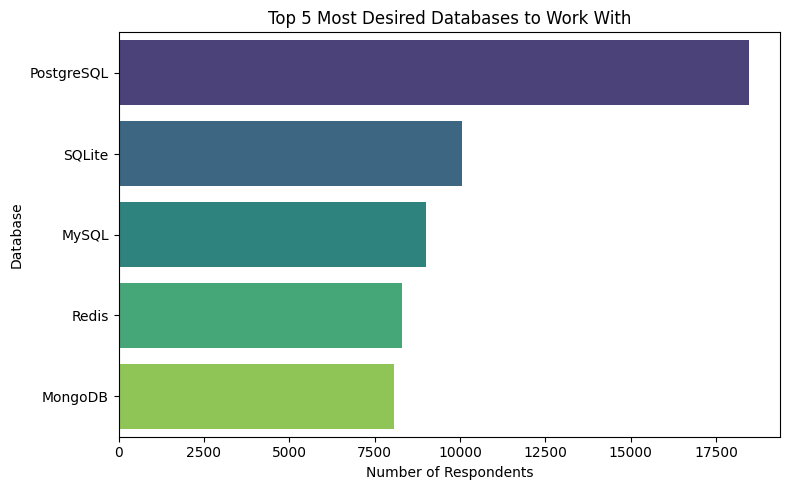

In [55]:
## Write your code here
# Step 1: Drop missing
db_series = df['DatabaseWantToWorkWith'].dropna()

# Step 2: Split comma-separated entries into individual values
db_exploded = db_series.str.split(';').explode().str.strip()

# Step 3: Get top 5 most mentioned databases
top5_dbs = db_exploded.value_counts().nlargest(5)

# Step 4: Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=top5_dbs.values, y=top5_dbs.index, palette='viridis')
plt.title('Top 5 Most Desired Databases to Work With')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


/tmp/ipykernel_300/1624177403.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_counts.index, y=remote_counts.values, palette='coolwarm')


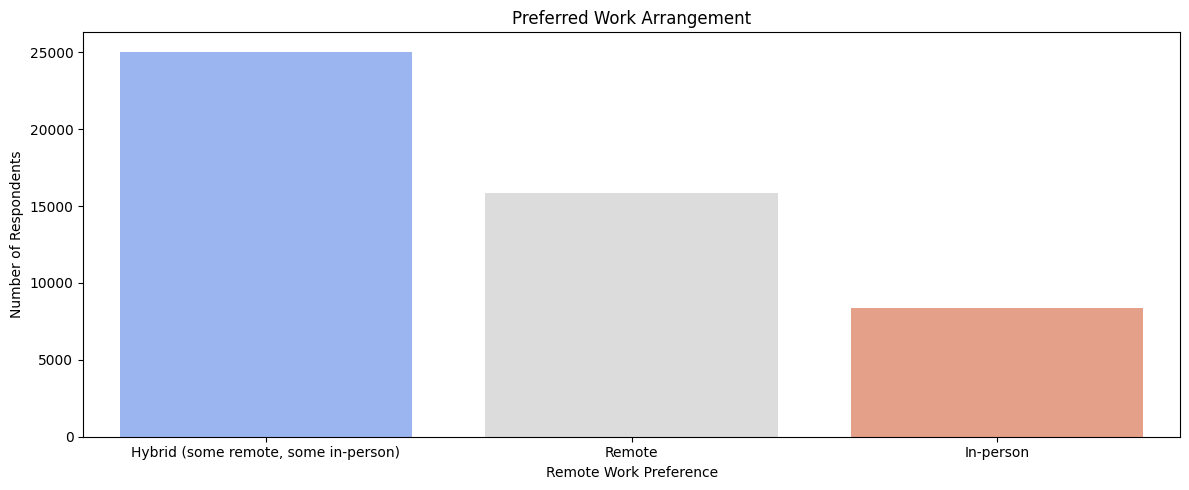

In [58]:
## Write your code here
# Drop missing values
remote_series = df['RemoteWork'].dropna()

# Count values
remote_counts = remote_series.value_counts()

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=remote_counts.index, y=remote_counts.values, palette='coolwarm')
plt.title('Preferred Work Arrangement')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [60]:
print(df.columns.to_list())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWork

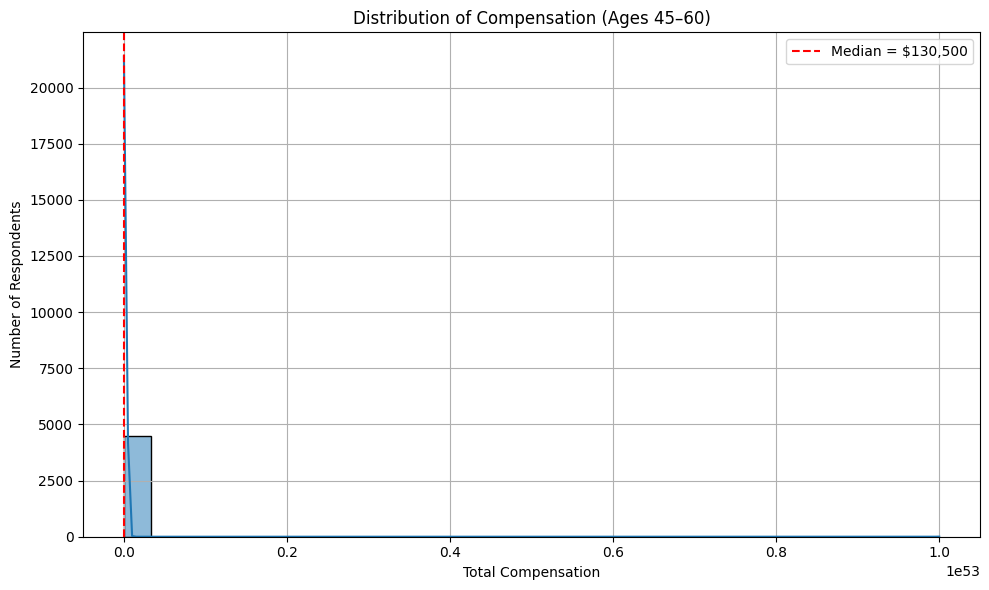

In [62]:
## Write your code here
# Step 1: Map age ranges to approximate midpoints
age_midpoints = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Step 2: Create new numeric age column
df['AgeNumeric'] = df['Age'].map(age_midpoints)

# Step 3: Filter for respondents aged ~45–60
df_midcareer = df[
    df['AgeNumeric'].between(40, 70) &
    df['CompTotal'].notna()
]

# Step 4: Plot CompTotal histogram
import seaborn as sns
import matplotlib.pyplot as plt

median_value = df_midcareer['CompTotal'].median()

plt.figure(figsize=(10, 6))
sns.histplot(df_midcareer['CompTotal'], bins=30, kde=True)
plt.axvline(median_value, color='red', linestyle='--', label=f'Median = ${int(median_value):,}')
plt.title('Distribution of Compensation (Ages 45–60)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


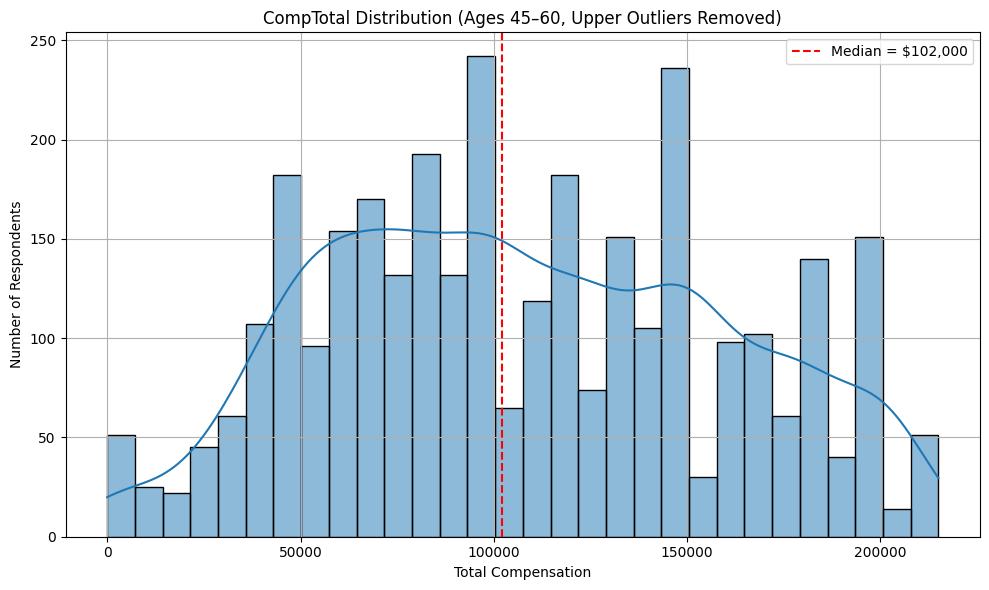

In [63]:
# Step 1: Mid-career age filter (reuse from earlier)
df['AgeNumeric'] = df['Age'].map(age_midpoints)
df_midcareer = df[
    df['AgeNumeric'].between(45, 60) &
    df['CompTotal'].notna()
]

# Step 2: Calculate Q1 and Q3
Q1 = df_midcareer['CompTotal'].quantile(0.25)
Q3 = df_midcareer['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Optional: print these if you want to inspect
#print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")

# Step 3: Filter out upper outliers (keep values ≤ Q3)
df_filtered = df_midcareer[df_midcareer['CompTotal'] <= Q3]

# Step 4: Plot histogram
import matplotlib.pyplot as plt
import seaborn as sns

median_value = df_filtered['CompTotal'].median()

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['CompTotal'], bins=30, kde=True)
plt.axvline(median_value, color='red', linestyle='--', label=f'Median = ${int(median_value):,}')
plt.title('CompTotal Distribution (Ages 45–60, Upper Outliers Removed)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


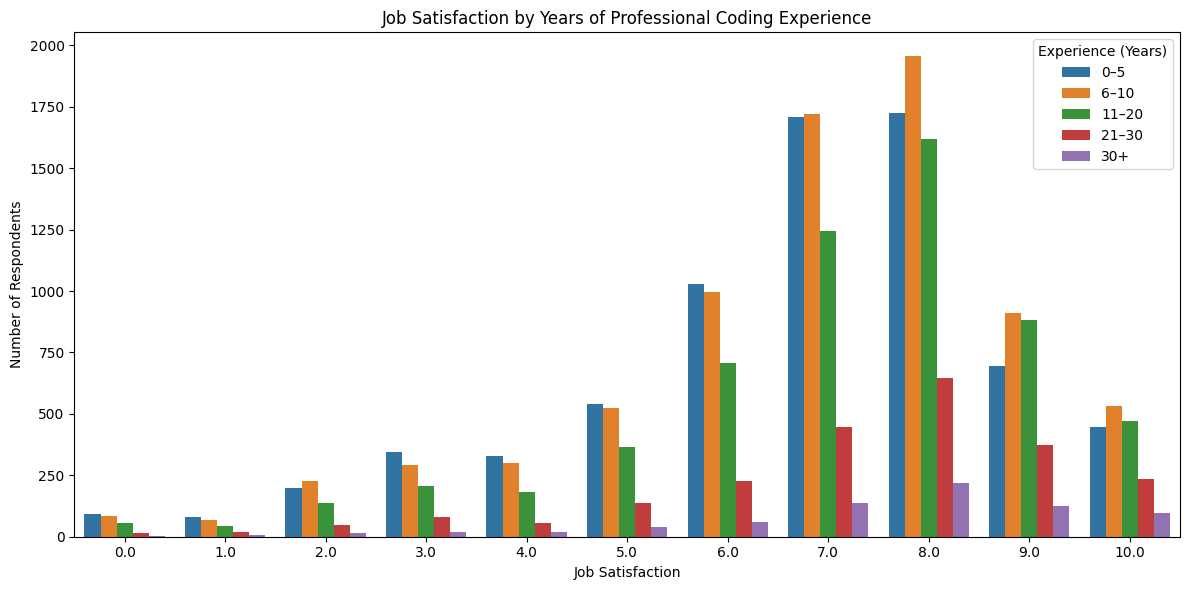

In [65]:
## Write your code here
# Step 1: Convert YearsCodePro to numeric
def clean_years(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodeProClean'] = df['YearsCodePro'].dropna().apply(clean_years)

# Step 2: Bin the experience levels
bins = [0, 5, 10, 20, 30, 100]
labels = ['0–5', '6–10', '11–20', '21–30', '30+']
df['ExperienceBin'] = pd.cut(df['YearsCodeProClean'], bins=bins, labels=labels)

# Step 3: Filter for valid JobSat and ExperienceBin
df_jobsat = df[df['JobSat'].notna() & df['ExperienceBin'].notna()]

# Optional: check what JobSat values are present
#print(df_jobsat['JobSat'].value_counts())

# Step 4: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df_jobsat, x='JobSat', hue='ExperienceBin')
plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Experience (Years)')
plt.tight_layout()
plt.show()


### Lab Summary: Visualizing and Comparing Survey Data

#### **What Was Done**

This lab focused on exploratory data visualization using survey data from Stack Overflow. Key tasks included:

1. **Histograms of Distributions**

   * Plotted the distribution of `CompTotal` (total compensation), filtering out high-end outliers using the IQR method (Q3 cutoff).
   * Visualized the distribution of `YearsCodePro` (professional experience) using cleaned numeric values.
   * Compared `CompTotal` across age groups using grouped histograms and an interactive 3D bar plot.

2. **Visualizing Relationships in Data**

   * Used grouped histograms to compare `CompTotal` across age groups.
   * Visualized `TimeSearching` (time spent searching for information) across age groups, correcting assumptions about missing categories.

3. **Composition of Data**

   * Extracted and visualized the **top 5 most desired databases** (`DatabaseWantToWorkWith`) by exploding multi-select responses.
   * Visualized preferences for **remote vs. hybrid vs. in-person** work (`RemoteWork`).

4. **Comparison of Groups**

   * Filtered compensation data for respondents aged **45–60**, re-mapped age ranges to numeric midpoints for proper filtering.
   * Cleaned and binned `YearsCodePro` to explore how **job satisfaction (`JobSat`)** varies with experience.

---

#### **Problems Encountered & How They Were Solved**

* **Non-numeric Age and Experience Fields**:
  `Age` and `YearsCodePro` were string ranges or descriptors (e.g. `"Less than 1 year"`). These were converted to numeric midpoints for filtering and binning using `map()` and custom functions.

* **Outliers in Compensation**:
  `CompTotal` included extreme outliers (e.g., values > \$1e+50). The IQR method (cutoff at Q3) was used to filter unrealistic values, revealing clearer distributions.

* **Missing Legends in Histograms**:
  Legends disappeared when using `element='step'` in `sns.histplot()`. This was fixed by switching to `element='bars'` or using 3D bar plots with properly set tick labels and viewing angles.

* **Unexpected Category Values**:
  Initially assumed `TimeSearching` had only two categories. This was corrected by inspecting `value_counts()` and updating the visual accordingly.

---

#### **Insights Gained**

* **Compensation distributions** vary significantly by age group and may reflect differences in geography, industry, or seniority — potentially multimodal among mid-career respondents.
* **Job satisfaction** increases slightly with years of experience, peaking in the 6–10 and 11–20 year ranges, but remains relatively strong across all groups.
* **Most desired databases** were PostgreSQL, SQLite, and MySQL, showing a preference for open-source, relational systems.
* **Hybrid work** is the clear preference among respondents, with remote work preferred over fully in-person roles.

---



### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
